In [249]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report

In [250]:
filePath = '‪C:/Users/Roselyn/Downloads/playerData.csv'

In [251]:
df = pd.read_csv('C:/Users/Roselyn/Downloads/playerData.csv')

C:\Users\Roselyn\AppData\Local\Temp\ipykernel_23492\3658555055.py:1: DtypeWarning: Columns (26,29,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Roselyn/Downloads/playerData.csv')


In [252]:
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64.0,28.0,26.0,38.0,48.0,51.0,NaN
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64.0,40.0,48.0,49.0,35.0,45.0,NaN
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63.0,39.0,44.0,46.0,40.0,53.0,NaN
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58.0,49.0,41.0,49.0,30.0,44.0,NaN


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  object 
 13  Weight            19020 non-null  object 
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

In [254]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [255]:
# TASK 1
# 1. Extract the player names from the PlayerUrl column and create a new column name Player
#   Name from the extracts


In [256]:
df.playerUrl.values[5900]

'http://sofifa.com/player/204677/oriol-rosell-argerich/210006/'

In [257]:
# creating a for-loop to look through the playerUrl columns

playerList = []

for items in df.playerUrl.values:
    player = items.split('/')[-3]
    playerList.append(player)
    
playerList

['lionel-messi',
 'c-ronaldo-dos-santos-aveiro',
 'jan-oblak',
 'kevin-de-bruyne',
 'neymar-da-silva-santos-jr',
 'robert-lewandowski',
 'mohamed-salah',
 'alisson-ramses-becker',
 'kylian-mbappe',
 'marc-andre-ter-stegen',
 'virgil-van-dijk',
 'sadio-mane',
 'carlos-henrique-venancio-casimiro',
 'thibaut-courtois',
 'manuel-neuer',
 'karim-benzema',
 'sergio-ramos-garcia',
 'sergio-aguero',
 'raheem-sterling',
 'ngolo-kante',
 'joshua-kimmich',
 'paulo-dybala',
 'ederson-santana-de-moraes',
 'harry-kane',
 'samir-handanovic',
 'kalidou-koulibaly',
 'eden-hazard',
 'toni-kroos',
 'antoine-griezmann',
 'jadon-sancho',
 'trent-alexander-arnold',
 'bernardo-mota-carvalho-e-silva',
 'andrew-robertson',
 'aymeric-laporte',
 'bruno-miguel-borges-fernandes',
 'fabio-henrique-tavares',
 'heung-min-son',
 'roberto-firmino-barbosa-de-oliveira',
 'keylor-navas',
 'giorgio-chiellini',
 'sergio-busquets-burgos',
 'pierre-emerick-aubameyang',
 'wojciech-szczesny',
 'angel-di-maria',
 'luka-modric',


In [258]:
'''
Every playerName has a separator which needs to 
be removed and replaced with a white space
'''

playerList = []

for items in df.playerUrl.values:
    player = items.split('/')[-3]
    player = player.replace('-', ' ') #Replace - with white spaces
    playerList.append(player)
    
playerList
    

['lionel messi',
 'c ronaldo dos santos aveiro',
 'jan oblak',
 'kevin de bruyne',
 'neymar da silva santos jr',
 'robert lewandowski',
 'mohamed salah',
 'alisson ramses becker',
 'kylian mbappe',
 'marc andre ter stegen',
 'virgil van dijk',
 'sadio mane',
 'carlos henrique venancio casimiro',
 'thibaut courtois',
 'manuel neuer',
 'karim benzema',
 'sergio ramos garcia',
 'sergio aguero',
 'raheem sterling',
 'ngolo kante',
 'joshua kimmich',
 'paulo dybala',
 'ederson santana de moraes',
 'harry kane',
 'samir handanovic',
 'kalidou koulibaly',
 'eden hazard',
 'toni kroos',
 'antoine griezmann',
 'jadon sancho',
 'trent alexander arnold',
 'bernardo mota carvalho e silva',
 'andrew robertson',
 'aymeric laporte',
 'bruno miguel borges fernandes',
 'fabio henrique tavares',
 'heung min son',
 'roberto firmino barbosa de oliveira',
 'keylor navas',
 'giorgio chiellini',
 'sergio busquets burgos',
 'pierre emerick aubameyang',
 'wojciech szczesny',
 'angel di maria',
 'luka modric',


In [259]:
# Create a New Column for the Extracted playerName

df['playerName'] = playerList

In [260]:
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,playerName
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel messi
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c ronaldo dos santos aveiro
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,jan oblak
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,kevin de bruyne
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,neymar da silva santos jr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,Medium,1 ★,64.0,28.0,26.0,38.0,48.0,51.0,NaN,ao xia
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,Medium,1 ★,64.0,40.0,48.0,49.0,35.0,45.0,NaN,ben hough
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,Medium,1 ★,63.0,39.0,44.0,46.0,40.0,53.0,NaN,ronan mckinley
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,Medium,1 ★,58.0,49.0,41.0,49.0,30.0,44.0,NaN,zhenao wang


In [261]:
'''
Question 2:
Create a new column titled Player Status from the CONTRACT column with 3 labels ; 
a. 'Active' If the player has an active contract 
b. 'Free', if the player is free 
c. 'On Loan' if the player is on loan 
'''

df.Contract.unique() # To see the unique values of the contract Column


array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [262]:
# Check for missing values in the Columns
df.Contract.isnull().sum()

0

In [263]:
# Create a list to convert Contract column to a List

contList = []

for item in df.Contract.values:
    if 'Free' in item:
        contList.append('Free')
    elif 'On Loan' in item:
        contList.append('On Loan')
    else:
        contList.append('Active')


contList 

['Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',
 'Active',

In [264]:
# Add contList to the Table ['playerStatus']

df['playerStatus'] = contList 

df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,playerName,playerStatus
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel messi,Active
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c ronaldo dos santos aveiro,Active
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,jan oblak,Active
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,kevin de bruyne,Active
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,neymar da silva santos jr,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,1 ★,64.0,28.0,26.0,38.0,48.0,51.0,NaN,ao xia,Active
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,1 ★,64.0,40.0,48.0,49.0,35.0,45.0,NaN,ben hough,Active
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,1 ★,63.0,39.0,44.0,46.0,40.0,53.0,NaN,ronan mckinley,Active
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,1 ★,58.0,49.0,41.0,49.0,30.0,44.0,NaN,zhenao wang,Active


In [265]:
# Do this to check if the Entries are Correct

df.values[3500]
df.loc[df['playerStatus'] =='On Loan']

# Assign values to dfx

dfx = df.loc[df['playerStatus'] =='On Loan']
dfx.values[0]


array([173731, 'G. Bale', 'Gareth Bale',
       'https://cdn.sofifa.com/players/173/731/21_60.png',
       'http://sofifa.com/player/173731/gareth-bale/210006/', 'Wales', 30,
       83.0, 83.0, '\n\n\n\nTottenham Hotspur', 'Jun 30, 2021 On Loan',
       'RW', '185cm', '82kg', 'Left', 83, 'RW', '1-Sep-13', '30-Jun-21',
       '€35M', '€200K', '€0', 417.0, 87.0, 81.0, 84.0, '80', 85.0, 419.0,
       '80', 90.0, 87.0, 79.0, 83.0, 397.0, 86.0, 89.0, 78.0, 79.0, 65.0,
       405.0, 90.0, 82.0, 69.0, 77.0, 87.0, 362.0, 65, 59.0, 83.0, 79,
       76.0, 85.0, 161.0, 54.0, 55.0, 52.0, 52.0, 15.0, 15.0, 11.0, 5.0,
       6, 2213.0, 465, '3 ★', '4★', 'Medium', 'Medium', '4 ★', 88.0, 84.0,
       82.0, 80.0, 58.0, 73.0, '282', 'gareth bale', 'On Loan'],
      dtype=object)

In [266]:
'''
Question 3:
 Unpack the POSITIONS column into as many columns as there are positions and assign Boolean 
values in the columns for each player as appropriate. Name the columns the play position
'''

df.Positions

0        RW, ST, CF
1            ST, LW
2                GK
3           CAM, CM
4           LW, CAM
            ...    
19016            CB
19017            CM
19018            CM
19019            RW
19020        CB, LB
Name: Positions, Length: 19021, dtype: object

In [267]:
df.Positions.unique()

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM', 'ST', 'RW',
       'ST, LW, RW', 'CB', 'LW', 'CDM', 'CF, ST', 'LW, RW', 'CDM, CM',
       'CDM, RB', 'CF, CAM', 'LW, ST', 'CM', 'ST, CF, LW', 'RM, LM, CAM',
       'RB', 'RW, CAM, CM', 'LB', 'LM, CF', 'CF', 'RW, LW', 'CAM, RM, RW',
       'CM, CDM', 'CAM, CF, ST', 'CM, CDM, CAM', 'CF, LW, CAM',
       'CAM, RM, CF', 'LM, ST', 'RM, LM, RW', 'LM', 'CAM, RW', 'CB, CDM',
       'RW, RM', 'LW, CF', 'CM, RM, LM', 'LB, LM', 'CAM, CM, RM',
       'CAM, CM, CF', 'CAM, CF', 'LM, RM, LW', 'LM, LB, CM', 'CM, LM, LB',
       'RM, RW', 'RM, CM', 'CAM, CM, LW', 'CB, LB', 'RM, RB', 'ST, RW',
       'LM, RW, LW', 'RB, LB', 'RB, RM', 'RM', 'LM, RM, CF', 'CAM, RM',
       'RB, RWB', 'CDM, CB, CM', 'CAM, RM, ST', 'LM, LW, RM', 'CM, CAM',
       'ST, RM, CF', 'LM, RM', 'RM, CF', 'LM, LWB', 'RW, RM, CF',
       'RB, CM', 'LW, CAM, RW', 'CAM, LW, CM', 'CM, CAM, CDM',
       'RW, LW, CAM', 'CM, CAM, LM', 'CM, RM, ST', 'CDM, CM, RB',
       'ST, CAM', 

In [268]:
# Create an Empty list to through the 'positions' column and strip each position of white spaces


posList = []

for val in df.Positions:
    if ',' in val:
        pList = val.split(',')
        playPos = [x.strip()for x in pList]  #Strip each position of white spaces
        posList.extend(playPos)
    else:
        val.strip()
        posList.append(val) 

In [269]:
pos = list(set(posList))

In [270]:
pos 

['LM',
 'CDM',
 'RWB',
 'CF',
 'LWB',
 'CM',
 'CB',
 'RW',
 'CAM',
 'LB',
 'ST',
 'RB',
 'RM',
 'GK',
 'LW']

In [271]:
# Create a new column for posList(posTable) 

playerPos = []

for Positions in df.Positions.values:
    posTable =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,] 
    for p in pos:
        if p in Positions:
            pidx = pos.index(p)
            posTable[pidx] = 1
        playerPos.append(posTable)

In [272]:
playerPos

[[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [273]:
# Create a DataFrame to pass the playerPos list into

dfPos = pd.DataFrame(playerPos, columns = pos) #Converting playerPos to a Table
dfPos 

,LM,CDM,RWB,CF,LWB,CM,CB,RW,CAM,LB,ST,RB,RM,GK,LW
0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285310,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
285311,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
285312,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
285313,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [274]:
df.Positions.values[0:5]

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM'], dtype=object)

In [275]:
# Merge dfPos to the main data set

dfNew = df.join(dfPos) # Combining player position table with the original data set
dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,CM,CB,RW,CAM,LB,ST,RB,RM,GK,LW
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,1,0,0,1,0,0,0,0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,1,0,0,1,0,0,0,0
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,0,0,1,0,0,1,0,0,0,0
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,0,0,1,0,0,1,0,0,0,0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,0,0,0,1,0,0,0,1,0,0
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,0,0,0,1,0,0,0,1,0,0
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,0,0,0,1,0,0,0,1,0,0
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,0,0,0,1,0,0,0,1,0,0


In [276]:
# Checking if the table is Correct


dfNew.values[0]



array([158023, 'L. Messi', 'Lionel Messi',
       'https://cdn.sofifa.com/players/158/023/21_60.png',
       'http://sofifa.com/player/158023/lionel-messi/210006/',
       'Argentina', 33, 93.0, 93.0, '\n\n\n\nFC Barcelona', '2004 ~ 2021',
       'RW, ST, CF', '170cm', '72kg', 'Left', 93, 'RW', '1-Jul-04', nan,
       '€103.5M', '€560K', '€138.4M', 429.0, 85.0, 95.0, 70.0, '91', 88.0,
       470.0, '96', 93.0, 94.0, 91.0, 96.0, 451.0, 91.0, 80.0, 91.0, 94.0,
       95.0, 389.0, 86.0, 68.0, 72.0, 69.0, 94.0, 347.0, 44, 40.0, 93.0,
       95, 75.0, 96.0, 91.0, 32.0, 35.0, 24.0, 54.0, 6.0, 11.0, 15.0,
       14.0, 8, 2231.0, 466, '4 ★', '4★', 'Medium', 'Low', '5 ★', 85.0,
       92.0, 91.0, 95.0, 38.0, 65.0, '771', 'lionel messi', 'Active', 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=object)

In [277]:
'''
Question 4: Weight and Height, W/F, SM and IR Columns: convert to integers 

''' 
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [278]:
df['W/F'] 

0        4 ★
1        4 ★
2        3 ★
3        5 ★
4        5 ★
        ... 
19016    2 ★
19017    2 ★
19018    2 ★
19019    3 ★
19020    3 ★
Name: W/F, Length: 19021, dtype: object

In [279]:
starList = []
for x1, x2, x3 in zip(df['W/F'].values, df['SM'].values, df['IR'].values):
    
    starList.append([x1[0], x2[0], x3[0]])
pd.DataFrame(starList, columns = ['W/F', 'SM', 'IR'])

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
19016,2,2,1
19017,2,2,1
19018,2,2,1
19019,3,2,1


In [280]:
# Joining starDf to dfNew

starDF = pd.DataFrame(starList, columns=['W/F1', 'SM1', 'IR1'])
dfNew = dfNew.join(starDF) 

In [281]:
dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,CAM,LB,ST,RB,RM,GK,LW,W/F1,SM1,IR1
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,1,0,0,0,0,4,4,5
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,1,0,0,0,0,4,5,5
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,0,0,1,0,0,0,0,3,1,3
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,0,0,1,0,0,0,0,5,4,4
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,0,0,1,0,0,0,0,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,1,0,0,0,1,0,0,2,2,1
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,1,0,0,0,1,0,0,2,2,1
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,1,0,0,0,1,0,0,2,2,1
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,1,0,0,0,1,0,0,3,2,1


In [282]:
df.Weight.unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       nan, '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs',
       '185lbs', '170lbs', '203lbs', '168lbs', '161lbs', '146lbs',
       '130lbs', '190lbs', '174lbs', '148lbs', '165lbs', '159lbs',
       '192lbs', '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg',
       '103kg', '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg',
       '107kg', '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [283]:
wList = []

for val in df.Weight.values:
    val = str(val) #forcing the values into strings
    if 'kg' in val:
        #print (val)
        #print(val[:-2])
        wList.append(float(val[:-2])) # Converting to float
    elif 'lbs' in val:
        wList.append(float(val[:-3])*0.453592) # converting to kg
    else:
        wList.append(val)
    
    
wList

[72.0,
 83.0,
 87.0,
 70.0,
 68.0,
 80.0,
 71.0,
 91.0,
 73.0,
 85.0,
 92.0,
 69.0,
 84.0,
 96.0,
 92.0,
 81.0,
 82.0,
 70.0,
 69.0,
 70.0,
 73.0,
 75.0,
 86.0,
 89.0,
 92.0,
 89.0,
 74.0,
 76.0,
 73.0,
 76.0,
 69.0,
 64.0,
 64.0,
 85.0,
 69.0,
 78.0,
 78.0,
 76.0,
 80.0,
 85.0,
 76.0,
 80.0,
 90.0,
 69.0,
 66.0,
 83.0,
 82.0,
 85.0,
 75.0,
 82.0,
 73.0,
 81.0,
 60.0,
 84.0,
 74.0,
 85.0,
 94.0,
 79.0,
 67.0,
 68.0,
 68.0,
 80.0,
 82.0,
 76.0,
 78.0,
 83.0,
 89.0,
 80.0,
 70.0,
 90.0,
 75.0,
 75.0,
 65.0,
 81.0,
 75.0,
 67.0,
 70.0,
 76.0,
 74.0,
 75.0,
 74.0,
 59.0,
 81.0,
 79.0,
 75.0,
 82.0,
 94.0,
 80.0,
 70.0,
 70.0,
 76.0,
 86.0,
 85.0,
 61.0,
 74.0,
 78.0,
 69.0,
 72.0,
 71.0,
 74.0,
 79.0,
 93.0,
 83.0,
 79.0,
 81.0,
 88.0,
 71.0,
 75.0,
 69.0,
 73.0,
 97.0,
 71.0,
 76.0,
 84.0,
 76.0,
 75.0,
 77.0,
 68.0,
 65.0,
 81.0,
 68.0,
 74.0,
 85.0,
 79.0,
 73.0,
 72.0,
 79.0,
 78.0,
 66.0,
 62.0,
 67.0,
 70.0,
 78.0,
 67.0,
 78.0,
 77.0,
 80.0,
 89.0,
 81.0,
 84.0,
 77.0,
 60.0,
 73.0,

In [284]:
dfNew['wt_kg'] = wList # Adding wt_kg to dfNew

dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,LB,ST,RB,RM,GK,LW,W/F1,SM1,IR1,wt_kg
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,1,0,0,0,0,4,4,5,72.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,1,0,0,0,0,4,5,5,83.0
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,0,1,0,0,0,0,3,1,3,87.0
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,0,1,0,0,0,0,5,4,4,70.0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,0,1,0,0,0,0,5,5,5,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,0,0,0,1,0,0,2,2,1,66.0
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,0,0,0,1,0,0,2,2,1,65.0
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,0,0,0,1,0,0,2,2,1,74.0
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,0,0,0,1,0,0,3,2,1,69.0


In [285]:
df.Height.unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [286]:
tempList = []

for val in df.Height:
    if 'cm' not in val:
        tempList.append(val)
        
xx = list(set(tempList))
print(xx)

['5\'4"', '6\'1"', '5\'7"', '5\'11"', '5\'6"', '6\'4"', '6\'2"', '6\'3"', '6\'5"', '5\'9"', '5\'10"', '6\'0"']


In [287]:
hgtList = []

for val in df.Height.values:
    val = str(val)
    if 'cm' in val:
        ht = float(val[:-2])
        hgtList.append(ht)
    elif val in xx:
        ft = val[0]
        inch = val[-2]
        # converting to cm
        hgt1 = float(ft)*30.48 + float(inch)*2.54
        hgtList.append(hgt1)
    else:
        hgtList.append(val)
        
hgtList

[170.0,
 187.0,
 188.0,
 181.0,
 175.0,
 184.0,
 175.0,
 191.0,
 178.0,
 187.0,
 193.0,
 175.0,
 185.0,
 199.0,
 193.0,
 185.0,
 184.0,
 173.0,
 170.0,
 168.0,
 176.0,
 177.0,
 188.0,
 188.0,
 193.0,
 187.0,
 175.0,
 183.0,
 176.0,
 180.0,
 180.0,
 173.0,
 178.0,
 189.0,
 179.0,
 188.0,
 183.0,
 181.0,
 185.0,
 187.0,
 189.0,
 187.0,
 195.0,
 180.0,
 172.0,
 182.0,
 188.0,
 185.0,
 186.0,
 192.0,
 173.0,
 191.0,
 165.0,
 191.0,
 179.0,
 194.0,
 191.0,
 183.0,
 173.0,
 167.0,
 170.0,
 182.0,
 191.0,
 191.0,
 176.0,
 188.0,
 189.0,
 188.0,
 186.0,
 196.0,
 175.0,
 184.0,
 181.0,
 186.0,
 183.0,
 179.0,
 175.0,
 180.0,
 182.0,
 181.0,
 180.0,
 163.0,
 186.0,
 183.0,
 176.0,
 190.0,
 191.0,
 180.0,
 174.0,
 183.0,
 181.0,
 191.0,
 190.0,
 169.0,
 183.0,
 187.0,
 175.0,
 178.0,
 180.0,
 183.0,
 185.0,
 190.0,
 185.0,
 181.0,
 174.0,
 194.0,
 181.0,
 179.0,
 171.0,
 171.0,
 195.0,
 170.0,
 184.0,
 190.0,
 189.0,
 184.0,
 185.0,
 170.0,
 172.0,
 188.0,
 181.0,
 178.0,
 187.0,
 190.0,
 178.0,


In [288]:
# adding 

dfNew['wt_kg'] = wList

dfNew


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,LB,ST,RB,RM,GK,LW,W/F1,SM1,IR1,wt_kg
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,1,0,0,0,0,4,4,5,72.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,1,0,0,0,0,4,5,5,83.0
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,0,1,0,0,0,0,3,1,3,87.0
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,0,1,0,0,0,0,5,4,4,70.0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,0,1,0,0,0,0,5,5,5,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,0,0,0,1,0,0,2,2,1,66.0
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,0,0,0,1,0,0,2,2,1,65.0
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,0,0,0,1,0,0,2,2,1,74.0
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,0,0,0,1,0,0,3,2,1,69.0


In [289]:
'''
Question 5:
Value, Wage and Release Clause columns: convert to Float 

'''

df.Value.unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [290]:
valList = [] # thousands

for val in df.Value:
    if 'K' in val:
        val = float(val[1:-1])*1000
        valList.append(val)
    elif 'M' in val:
        val = float(val[1:-1])*1000000
    else:
        valList.append(float(0))
        
        
valList
        

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 825000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 825000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 825000.0,
 0.0,
 0.0,
 0.0,
 950000.0,
 625000.0,
 0.0,
 0.0,
 0.0,
 625000.0,
 625000.0,
 950000.0,
 950000.0,
 625000.0,
 625000.0,
 0.0,
 0.0,
 625000.0,
 625000.0,
 0.0,
 0.0,
 475000.0,
 925000.0,
 750000.0,
 0.0,
 475000.0,
 0.0,
 725000.0,
 475000.0,
 925000.0,
 750000.0,
 0.0,
 725000.0,
 475000.0,
 925000.0,
 725000.0,
 725000.0,
 925000.0,
 475000.0,
 0.0,
 350000.0,
 525000.0,
 350000.0,
 350000.0,
 350000.0,
 0.0,
 350000.0,
 0.0,
 600000.0,
 0.0,
 850000.0,
 350000.0,
 525000.0,
 0.0,
 350000.0,
 350000.0,
 0.0,
 800000.0,
 0.0,
 525000.0,
 800000.0,
 0.0,
 550000.0,
 0.0,
 550000.0,
 0.0,
 925000.0,
 525000.0,
 525000.0,
 0.0,
 350000.0,
 0.0,
 350000.0,
 0.0,
 800000.0,
 550000.0,
 350000.0,
 0.0,
 525000.0,
 800

In [291]:
df.Wage.unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

In [292]:
wageList = []

for w in df.Wage:
    if 'K' in w:
        w = w[1:-1]
        wageList.append(float(w)*1000)
    else:
        w = w[1:]
        wageList.append(float(w)*1000)
        
wageList

[560000.0,
 220000.0,
 125000.0,
 370000.0,
 270000.0,
 240000.0,
 250000.0,
 160000.0,
 160000.0,
 260000.0,
 210000.0,
 250000.0,
 310000.0,
 250000.0,
 130000.0,
 350000.0,
 300000.0,
 300000.0,
 270000.0,
 190000.0,
 145000.0,
 190000.0,
 195000.0,
 220000.0,
 100000.0,
 140000.0,
 350000.0,
 310000.0,
 290000.0,
 82000.0,
 110000.0,
 230000.0,
 155000.0,
 200000.0,
 195000.0,
 155000.0,
 165000.0,
 190000.0,
 110000.0,
 95000.0,
 240000.0,
 170000.0,
 105000.0,
 160000.0,
 260000.0,
 115000.0,
 125000.0,
 125000.0,
 130000.0,
 150000.0,
 230000.0,
 220000.0,
 135000.0,
 190000.0,
 160000.0,
 220000.0,
 95000.0,
 55000.0,
 58000.0,
 100000.0,
 220000.0,
 140000.0,
 145000.0,
 95000.0,
 115000.0,
 105000.0,
 81000.0,
 130000.0,
 150000.0,
 34000.0,
 100000.0,
 100000.0,
 140000.0,
 190000.0,
 115000.0,
 210000.0,
 120000.0,
 135000.0,
 59000.0,
 135000.0,
 190000.0,
 120000.0,
 130000.0,
 95000.0,
 90000.0,
 105000.0,
 165000.0,
 120000.0,
 150000.0,
 170000.0,
 155000.0,
 65000.0,


In [293]:
list(df['Release Clause'].unique())

['€138.4M',
 '€75.9M',
 '€159.4M',
 '€161M',
 '€166.5M',
 '€132M',
 '€144.3M',
 '€120.3M',
 '€203.1M',
 '€147.7M',
 '€145.3M',
 '€122M',
 '€119M',
 '€47.9M',
 '€108.7M',
 '€50.2M',
 '€98.1M',
 '€139.6M',
 '€96.9M',
 '€112.1M',
 '€122.5M',
 '€103M',
 '€140.2M',
 '€27.2M',
 '€85M',
 '€118.9M',
 '€112.8M',
 '€103.5M',
 '€132.1M',
 '€115.5M',
 '€102M',
 '€107.8M',
 '€124.4M',
 '€104.9M',
 '€99.8M',
 '€96.2M',
 '€50M',
 '€25.6M',
 '€77.9M',
 '€85.5M',
 '€56.1M',
 '€72.2M',
 '€64.6M',
 '€51.3M',
 '€82.5M',
 '€69.3M',
 '€59.9M',
 '€98.8M',
 '€96.3M',
 '€53.2M',
 '€43.1M',
 '€48.5M',
 '€47.3M',
 '€58.7M',
 '€65.6M',
 '€67.5M',
 '€84.7M',
 '€87M',
 '€95.8M',
 '€119.7M',
 '€91.6M',
 '€79M',
 '€111.3M',
 '€78.9M',
 '€81.9M',
 '€88.8M',
 '€86.9M',
 '€94.6M',
 '€69.4M',
 '€78M',
 '€97.8M',
 '€86.6M',
 '€107.3M',
 '€63.8M',
 '€54.2M',
 '€21.9M',
 '€66.2M',
 '€79.9M',
 '€52M',
 '€68.5M',
 '€56.4M',
 '€66.3M',
 '€44.2M',
 '€29.7M',
 '€40.8M',
 '€68.9M',
 '€24.7M',
 '€72.8M',
 '€57.8M',
 '€72.1M',
 '€7

In [294]:
rvalList = []

for val in df['Release Clause'].values:
    val = str(val)
    if 'K' in val:
        val = float(val[1:-1])*1000
        rvalList.append(val)
    elif 'M' in val:
        val = float(val[1:-1])*1000000
    else:
        rvalList.append(float(0))
        
rvalList

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 978000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

In [295]:
df.Hits.unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [296]:
df['Hits'].isna().sum() # Checking for Null values in Hits Column

2595

In [297]:
hList = []
for val in df.Hits:
    val = str(val)
    if 'K' in val:
        val = float(val[:-1])*1000
        hList.append(val)
    elif val.isnumeric():
        hList.append(float(val))
        '''elif val.isdigit() or val.isalnum():
        print(val)'''
    else:
        #val.isalnum() 
        hList.append('nan')
        
hList

[771.0,
 562.0,
 150.0,
 207.0,
 595.0,
 248.0,
 246.0,
 120.0,
 1600.0,
 130.0,
 321.0,
 189.0,
 175.0,
 96.0,
 118.0,
 216.0,
 212.0,
 154.0,
 205.0,
 202.0,
 339.0,
 408.0,
 103.0,
 332.0,
 86.0,
 173.0,
 246.0,
 161.0,
 396.0,
 1100.0,
 433.0,
 242.0,
 206.0,
 177.0,
 1500.0,
 198.0,
 459.0,
 173.0,
 117.0,
 130.0,
 119.0,
 209.0,
 84.0,
 187.0,
 165.0,
 203.0,
 65.0,
 336.0,
 126.0,
 313.0,
 124.0,
 154.0,
 145.0,
 538.0,
 182.0,
 175.0,
 101.0,
 45.0,
 103.0,
 377.0,
 99.0,
 194.0,
 161.0,
 403.0,
 414.0,
 593.0,
 374.0,
 245.0,
 3200.0,
 266.0,
 299.0,
 309.0,
 215.0,
 265.0,
 211.0,
 112.0,
 203.0,
 337.0,
 70.0,
 159.0,
 688.0,
 116.0,
 63.0,
 144.0,
 123.0,
 71.0,
 224.0,
 113.0,
 175.0,
 130.0,
 168.0,
 61.0,
 89.0,
 137.0,
 278.0,
 75.0,
 148.0,
 176.0,
 197.0,
 264.0,
 214.0,
 182.0,
 247.0,
 402.0,
 440.0,
 1700.0,
 2300.0,
 171.0,
 320.0,
 266.0,
 211.0,
 203.0,
 657.0,
 87.0,
 259.0,
 200.0,
 255.0,
 113.0,
 171.0,
 253.0,
 182.0,
 196.0,
 60.0,
 161.0,
 97.0,
 85.0,
 1

In [298]:
'''
Question 7:

Create 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into 
which you convert the respective values into clusters/labels as follows 
a. Height: Bucket intervals of 10 years 
b. Weight: Bucket intervals of 10 kg 
c. Wage: bucket intervals of 50K 
d. Value: bucket intervals of 50M 
e. Release Clause: bucket intervals of 50M 


'''

dfNew.Height.unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [299]:
dfNew['hgt'] = hgtList

dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,ST,RB,RM,GK,LW,W/F1,SM1,IR1,wt_kg,hgt
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,1,0,0,0,0,4,4,5,72.0,170.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,1,0,0,0,0,4,5,5,83.0,187.0
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,1,0,0,0,0,3,1,3,87.0,188.0
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,1,0,0,0,0,5,4,4,70.0,181.0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,1,0,0,0,0,5,5,5,68.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,0,0,1,0,0,2,2,1,66.0,178.0
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,0,0,1,0,0,2,2,1,65.0,175.0
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,0,0,1,0,0,2,2,1,74.0,179.0
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,0,0,1,0,0,3,2,1,69.0,175.0


In [300]:
dfNew.hgt

0        170.0
1        187.0
2        188.0
3        181.0
4        175.0
         ...  
19016    178.0
19017    175.0
19018    179.0
19019    175.0
19020    188.0
Name: hgt, Length: 19021, dtype: float64

In [301]:
min(dfNew.hgt)

152.4

In [302]:
Upperbands = []

count = 1

while count <= max(dfNew['hgt'])/10:
    Upperbands.append(10*count)
    count+=1

In [303]:
max(dfNew['hgt'])

206.0

In [304]:
Upperbands

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200]

In [305]:
dfNew['hgt_bins'] = pd.cut(x=dfNew['hgt'], bins=Upperbands)

dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,RB,RM,GK,LW,W/F1,SM1,IR1,wt_kg,hgt,hgt_bins
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,0,0,4,4,5,72.0,170.0,"(160, 170]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,0,0,4,5,5,83.0,187.0,"(180, 190]"
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,0,0,0,0,3,1,3,87.0,188.0,"(180, 190]"
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,0,0,0,0,5,4,4,70.0,181.0,"(180, 190]"
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,0,0,0,0,5,5,5,68.0,175.0,"(170, 180]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,0,1,0,0,2,2,1,66.0,178.0,"(170, 180]"
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,0,1,0,0,2,2,1,65.0,175.0,"(170, 180]"
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,0,1,0,0,2,2,1,74.0,179.0,"(170, 180]"
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,0,1,0,0,3,2,1,69.0,175.0,"(170, 180]"


In [306]:
list(dfNew.hgt_bins.unique())

[Interval(160.0, 170.0, closed='right'),
 Interval(180.0, 190.0, closed='right'),
 Interval(170.0, 180.0, closed='right'),
 Interval(190.0, 200.0, closed='right'),
 Interval(150.0, 160.0, closed='right'),
 nan]

In [307]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                19021 non-null  int64   
 1   Name              19021 non-null  object  
 2   LongName          19021 non-null  object  
 3   photoUrl          19021 non-null  object  
 4   playerUrl         19021 non-null  object  
 5   Nationality       19021 non-null  object  
 6   Age               19021 non-null  int64   
 7   ↓OVA              19019 non-null  float64 
 8   POT               19020 non-null  float64 
 9   Club              19021 non-null  object  
 10  Contract          19021 non-null  object  
 11  Positions         19021 non-null  object  
 12  Height            19021 non-null  object  
 13  Weight            19020 non-null  object  
 14  Preferred Foot    19021 non-null  object  
 15  BOV               19021 non-null  int64   
 16  Best Position     190

In [308]:
dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,RB,RM,GK,LW,W/F1,SM1,IR1,wt_kg,hgt,hgt_bins
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,0,0,4,4,5,72.0,170.0,"(160, 170]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,0,0,4,5,5,83.0,187.0,"(180, 190]"
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,0,0,0,0,3,1,3,87.0,188.0,"(180, 190]"
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,0,0,0,0,5,4,4,70.0,181.0,"(180, 190]"
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,0,0,0,0,5,5,5,68.0,175.0,"(170, 180]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,0,1,0,0,2,2,1,66.0,178.0,"(170, 180]"
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,0,1,0,0,2,2,1,65.0,175.0,"(170, 180]"
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,0,1,0,0,2,2,1,74.0,179.0,"(170, 180]"
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,0,1,0,0,3,2,1,69.0,175.0,"(170, 180]"


In [309]:
dfNew.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [310]:
dfNew['wg'] = wageList

In [311]:
max(dfNew['wg'])

950000.0

In [312]:
Upperbands = []

count = 1

while count <= max(dfNew['wg'])/50000:
    Upperbands.append(50000*count)
    count+=1
    
    
Upperbands 

[50000,
 100000,
 150000,
 200000,
 250000,
 300000,
 350000,
 400000,
 450000,
 500000,
 550000,
 600000,
 650000,
 700000,
 750000,
 800000,
 850000,
 900000,
 950000]

In [313]:
dfNew['wg_bins'] = pd.cut(x=dfNew['wg'], bins=Upperbands)


dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,GK,LW,W/F1,SM1,IR1,wt_kg,hgt,hgt_bins,wg,wg_bins
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,4,4,5,72.0,170.0,"(160, 170]",560000.0,"(550000.0, 600000.0]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,4,5,5,83.0,187.0,"(180, 190]",220000.0,"(200000.0, 250000.0]"
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,0,0,3,1,3,87.0,188.0,"(180, 190]",125000.0,"(100000.0, 150000.0]"
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,0,0,5,4,4,70.0,181.0,"(180, 190]",370000.0,"(350000.0, 400000.0]"
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,0,0,5,5,5,68.0,175.0,"(170, 180]",270000.0,"(250000.0, 300000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,0,0,2,2,1,66.0,178.0,"(170, 180]",1000.0,NaN
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,0,0,2,2,1,65.0,175.0,"(170, 180]",500000.0,"(450000.0, 500000.0]"
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,0,0,2,2,1,74.0,179.0,"(170, 180]",500000.0,"(450000.0, 500000.0]"
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,0,0,3,2,1,69.0,175.0,"(170, 180]",2000.0,NaN


In [314]:
list(dfNew.columns)

['ID',
 'Name',
 'LongName',
 'photoUrl',
 'playerUrl',
 'Nationality',
 'Age',
 '↓OVA',
 'POT',
 'Club',
 'Contract',
 'Positions',
 'Height',
 'Weight',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits',
 'play

In [315]:
refCols = ['ID',
 'Name',
 'LongName',
 'photoUrl',
 'playerUrl',
 'Nationality',
 'Age',
 '↓OVA',
 'POT',
 'Club',
 'Contract',
 'Positions',
 'Height',
 'Weight',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits',
 'playerName',
 'playerStatus',
 'LB',
 'LWB',
 'RB',
 'CM',
 'RWB',
 'CDM',
 'ST',
 'LW',
 'GK',
 'CF',
 'CAM',
 'CB',
 'RM',
 'LM',
 'RW',
 'W/F1',
 'SM1',
 'IR1',
 'wt_kg',
 'hgt',
 'hgt_bins',
 'wg',
 'wg_bins']

In [316]:
dfNew[refCols]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,LM,RW,W/F1,SM1,IR1,wt_kg,hgt,hgt_bins,wg,wg_bins
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,1,4,4,5,72.0,170.0,"(160, 170]",560000.0,"(550000.0, 600000.0]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,1,4,5,5,83.0,187.0,"(180, 190]",220000.0,"(200000.0, 250000.0]"
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,0,1,3,1,3,87.0,188.0,"(180, 190]",125000.0,"(100000.0, 150000.0]"
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,0,1,5,4,4,70.0,181.0,"(180, 190]",370000.0,"(350000.0, 400000.0]"
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,0,1,5,5,5,68.0,175.0,"(170, 180]",270000.0,"(250000.0, 300000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,0,0,2,2,1,66.0,178.0,"(170, 180]",1000.0,NaN
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,0,0,2,2,1,65.0,175.0,"(170, 180]",500000.0,"(450000.0, 500000.0]"
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,0,0,2,2,1,74.0,179.0,"(170, 180]",500000.0,"(450000.0, 500000.0]"
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,0,0,3,2,1,69.0,175.0,"(170, 180]",2000.0,NaN


In [317]:
dfNew.head(15)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,GK,LW,W/F1,SM1,IR1,wt_kg,hgt,hgt_bins,wg,wg_bins
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,4,4,5,72.0,170.0,"(160, 170]",560000.0,"(550000, 600000]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,4,5,5,83.0,187.0,"(180, 190]",220000.0,"(200000, 250000]"
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,0,0,3,1,3,87.0,188.0,"(180, 190]",125000.0,"(100000, 150000]"
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,0,0,5,4,4,70.0,181.0,"(180, 190]",370000.0,"(350000, 400000]"
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,0,0,5,5,5,68.0,175.0,"(170, 180]",270000.0,"(250000, 300000]"
5,188545,R. Lewandowski,Robert Lewandowski,https://cdn.sofifa.com/players/188/545/21_60.png,http://sofifa.com/player/188545/robert-lewando...,Poland,31,91.0,91.0,\n\n\n\nFC Bayern München,...,0,0,4,4,4,80.0,184.0,"(180, 190]",240000.0,"(200000, 250000]"
6,209331,M. Salah,Mohamed Salah,https://cdn.sofifa.com/players/209/331/21_60.png,http://sofifa.com/player/209331/mohamed-salah/...,Egypt,28,90.0,90.0,\n\n\n\nLiverpool,...,0,0,3,4,3,71.0,175.0,"(170, 180]",250000.0,"(200000, 250000]"
7,212831,Alisson,Alisson Ramses Becker,https://cdn.sofifa.com/players/212/831/21_60.png,http://sofifa.com/player/212831/alisson-ramses...,Brazil,27,90.0,91.0,\n\n\n\nLiverpool,...,0,0,3,1,3,91.0,191.0,"(190, 200]",160000.0,"(150000, 200000]"
8,231747,K. Mbappé,Kylian Mbappé,https://cdn.sofifa.com/players/231/747/21_60.png,http://sofifa.com/player/231747/kylian-mbappe/...,France,21,90.0,95.0,\n\n\n\nParis Saint-Germain,...,0,0,4,5,3,73.0,178.0,"(170, 180]",160000.0,"(150000, 200000]"
9,192448,M. ter Stegen,Marc-André ter Stegen,https://cdn.sofifa.com/players/192/448/21_60.png,http://sofifa.com/player/192448/marc-andre-ter...,Germany,28,90.0,93.0,\n\n\n\nFC Barcelona,...,0,0,4,1,3,85.0,187.0,"(180, 190]",260000.0,"(250000, 300000]"


In [318]:
dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,GK,LW,W/F1,SM1,IR1,wt_kg,hgt,hgt_bins,wg,wg_bins
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,4,4,5,72.0,170.0,"(160, 170]",560000.0,"(550000.0, 600000.0]"
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,4,5,5,83.0,187.0,"(180, 190]",220000.0,"(200000.0, 250000.0]"
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,0,0,3,1,3,87.0,188.0,"(180, 190]",125000.0,"(100000.0, 150000.0]"
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,0,0,5,4,4,70.0,181.0,"(180, 190]",370000.0,"(350000.0, 400000.0]"
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,0,0,5,5,5,68.0,175.0,"(170, 180]",270000.0,"(250000.0, 300000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,0,0,2,2,1,66.0,178.0,"(170, 180]",1000.0,NaN
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,0,0,2,2,1,65.0,175.0,"(170, 180]",500000.0,"(450000.0, 500000.0]"
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,0,0,2,2,1,74.0,179.0,"(170, 180]",500000.0,"(450000.0, 500000.0]"
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,0,0,3,2,1,69.0,175.0,"(170, 180]",2000.0,NaN


In [319]:
dfNew.dtypes

ID              int64
Name           object
LongName       object
photoUrl       object
playerUrl      object
               ...   
wt_kg          object
hgt           float64
hgt_bins     category
wg            float64
wg_bins      category
Length: 102, dtype: object

In [320]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Columns: 102 entries, ID to wg_bins
dtypes: category(2), float64(47), int64(22), object(31)
memory usage: 14.5+ MB


In [321]:
dfNew.shape

(19021, 102)

In [322]:
dfNew.dtypes

ID              int64
Name           object
LongName       object
photoUrl       object
playerUrl      object
               ...   
wt_kg          object
hgt           float64
hgt_bins     category
wg            float64
wg_bins      category
Length: 102, dtype: object

In [323]:
# Checking for duplicates in the Dataframe


duplicates = dfNew.duplicated()

#  Count the number of duplicates rows
num_duplicates = duplicates.sum()

print("number of duplicate rows:", num_duplicates)

number of duplicate rows: 0


In [324]:
#check for null values in each column
null_values =dfNew.isnull().any(axis=0)
#get the names of columns with null values
columns_with_null = dfNew.columns[null_values].tolist()
print("Columns with null values",columns_with_null)

Columns with null values ['↓OVA', 'POT', 'Weight', 'Loan Date End', 'Release Clause', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Interceptions', 'Positioning', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'Total Stats', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'hgt_bins', 'wg_bins']


In [325]:
list(dfNew.isna().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 18006,
 0,
 0,
 3,
 1,
 1,
 5,
 8,
 9,
 7,
 6,
 1,
 8,
 6,
 3,
 3,
 5,
 4,
 3,
 2,
 4,
 7,
 1,
 2,
 4,
 1,
 5,
 7,
 6,
 0,
 4,
 1,
 0,
 1,
 1,
 1,
 2,
 3,
 1,
 3,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 3,
 5,
 2,
 5,
 1,
 2595,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 20,
 0,
 14732]

In [326]:
# Checking for duplicates in the Dataframe


duplicates = dfNew.duplicated()

#  Count the number of duplicates rows
num_duplicates = duplicates.sum()

print("number of duplicate rows:", num_duplicates)

number of duplicate rows: 0


In [327]:
# Dropping irrelevant columns 

dfNew = dfNew.drop(['Loan Date End','Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
                    'Long Shots', 'Mentality', 'Interceptions','Positioning', 'Standing Tackle',
                    'Sliding Tackle', 'Goalkeeping', 'GK Diving',
                    'GK Handling', 'GK Kicking', 'GK Positioning' ], axis=1)

In [328]:
# Calculate the number of null values in each column
null_counts = dfNew.isnull().sum()

# Filter columns with less than 20 null values
columns_to_check = null_counts[null_counts < 20].index

# Replace null values in the selected columns 
dfNew = dfNew.dropna(subset=columns_to_check)

In [329]:
# Re-check for Null values


list(dfNew.isna().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2586,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 20,
 0,
 14663]

In [330]:
#check for null values in each column
null_values =dfNew.isnull().any(axis=0)
#get the names of columns with null values
columns_with_null = dfNew.columns[null_values].tolist()
print("Columns with null values",columns_with_null)

Columns with null values ['Hits', 'hgt_bins', 'wg_bins']


In [331]:
#Replacing value using Hits column
dfNew['Hits'] = pd.to_numeric(dfNew['Hits'], errors='coerce')

#cal the mean of the Hits col
mean_Hits = dfNew['Hits'].mean()

#Replace the null values with mean
dfNew['Hits'].fillna(mean_Hits, inplace=True)

In [332]:
#check for null values in each column
null_values =dfNew.isnull().any(axis=0)
#get the names of columns with null values
columns_with_null = dfNew.columns[null_values].tolist()
print("Columns with null values",columns_with_null)

Columns with null values ['hgt_bins', 'wg_bins']


In [333]:
#it is a categorical column so i am replacing it with the mode 
dfNew['hgt_bins'].fillna(dfNew['hgt_bins'].mode()[0], inplace=True)

In [334]:
#it is a categorical column so i am replacing it with the mode 
dfNew['wg_bins'].fillna(dfNew['wg_bins'].mode()[0], inplace=True)

In [335]:
# Last check for null values in each column AGAIN
null_values =dfNew.isnull().any(axis=0)
#get the names of columns with null values
columns_with_null = dfNew.columns[null_values].tolist()
print("Columns with null values",columns_with_null)

Columns with null values []


In [336]:
# Analyzing the statistical of the  numerical features

dfNew.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Volleys,...,RW,CAM,LB,ST,RB,RM,GK,LW,hgt,wg
count,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000,...,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000
mean,226516.417925,25.180627,65.667952,71.101299,66.703444,248.680786,49.634467,45.791803,51.902873,42.637953,...,0.098764,0.142970,0.094803,0.183268,0.093430,0.125066,0.110331,0.102250,181.186434,128850.163727
std,27033.161482,4.705280,6.925898,6.099371,6.707703,74.152805,18.098995,19.539127,17.274505,17.611555,...,0.298353,0.350052,0.292950,0.386896,0.291041,0.330802,0.313310,0.302985,6.864196,248589.016924
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,0.000000
25%,210313.500000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,176.000000,2000.000000
50%,232488.500000,25.000000,66.000000,71.000000,67.000000,262.000000,54.000000,49.000000,55.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.000000,6000.000000
75%,246954.750000,28.000000,70.000000,75.000000,71.000000,297.000000,63.000000,62.000000,64.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.000000,36000.000000
max,259216.000000,53.000000,93.000000,95.000000,93.000000,437.000000,94.000000,95.000000,93.000000,90.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,206.000000,950000.000000


<AxesSubplot:ylabel='Hits'>

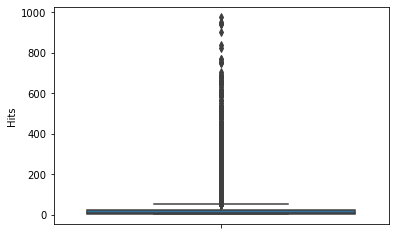

In [337]:
# Inspect for Outliers
# Use boxplots
#Gaussian
# Convert 'Hits' column to numeric
dfNew['Hits'] = pd.to_numeric(dfNew['Hits'], errors='coerce')

# Create the boxplot with vertical orientation
sns.boxplot(y='Hits', data=dfNew, orient='v')

<AxesSubplot:ylabel='Density'>

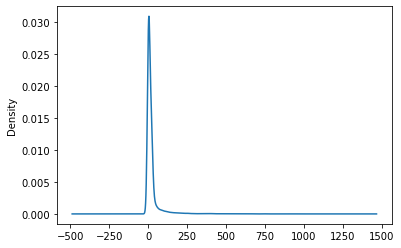

In [338]:
dfNew['Hits'].plot(kind='density')

In [339]:
# Function to find the upper and lower limits(25th perc data point anf the 75th Perc datapoint)

def outlier_lim(col):
    q3, q1 = np.percentile(col,[75,25]) # identifying datapoints that lie at the 75th and 25th percentile point
    iqr = q3 - q1 # obtaining the range of data contained within the box of the boxplot (50% of the data samples)
    upper_lim = q3 + 1.5 * iqr # getting the uppler limit for outlier exclusion
    lower_lim = q1 - 1.5*iqr # getting the lower limit for otlier exclusion
    
    return q3, q1, upper_lim, lower_lim

In [340]:
q3, q1, upper_lim, lower_lim = outlier_lim(dfNew.Hits)

In [341]:
q1

3.0

In [342]:
q3

22.485723039215685

In [343]:
upper_lim

51.71430759803921

In [344]:
lower_lim

-26.228584558823528

In [345]:
#xx = df.loc[df['Hits']< 3.0] # getting a subset of the data for BMI values below q1

# Convert 'Hits' column to numeric (if applicable)
df['Hits'] = pd.to_numeric(df['Hits'], errors='coerce')

# Filter rows where the 'Hits' column has values less than 3.0
xx = df.loc[df['Hits'] < 3.0]

In [346]:
len(dfNew)

18934

In [347]:
len(xx)

4593

In [348]:
len(xx)/len(dfNew) # quick computation of the percentage of data points below q1

0.24257948663779444

In [349]:
xxUpper = dfNew.loc[dfNew['Hits']>51.71430759803921] # getting a subset of the data for Hits values above upper_lim

In [350]:
len(xxUpper)

1515

In [351]:
xxLower = dfNew.loc[dfNew['Hits'] < -26.228584558823528]# getting a subset of the data for Hits values below lower_lim

In [352]:
len(xxLower)

0

In [353]:
# Separating Numerical Data and Non-Numerical Data by splitting the data into Numeric and Non-Numerics


continous_var = dfNew.select_dtypes('float64').columns
catergorical_var =dfNew.select_dtypes('object').columns

In [354]:
continous_var

Index(['↓OVA', 'POT', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Volleys', 'Skill', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Total Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'hgt',
       'wg'],
      dtype='object')

In [355]:
catergorical_var

Index(['Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Club',
       'Contract', 'Positions', 'Height', 'Weight', 'Preferred Foot',
       'Best Position', 'Joined', 'Value', 'Wage', 'Release Clause',
       'Short Passing', 'Dribbling', 'W/F', 'SM', 'A/W', 'D/W', 'IR',
       'playerName', 'playerStatus', 'W/F1', 'SM1', 'IR1', 'wt_kg'],
      dtype='object')

In [356]:
def featureSplitter(dfNew):  # a quick way to get a description of waht a function does
    continous_var = dfNew.select_dtypes('float64').columns
    catergorical_var =dfNew.select_dtypes('object').columns
    
    return continous_var, catergorical_var

In [357]:
# Getting the Numerical and Catergorical Columns

numCols, catCols = featureSplitter(dfNew)

In [358]:
numCols

Index(['↓OVA', 'POT', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Volleys', 'Skill', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Total Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'hgt',
       'wg'],
      dtype='object')

In [359]:
# Function to find the upper and lower limits(25th perc data point anf the 75th Perc datapoint)

def outlier_lim(col):
    q3, q1 = np.percentile(col,[75,25]) # identifying datapoints that lie at the 75th and 25th percentile point
    iqr = q3 - q1 # obtaining the range of data contained within the box of the boxplot (50% of the data samples)
    upper_lim = q3 + 1.5 * iqr # getting the uppler limit for outlier exclusion
    lower_lim = q1 - 1.5*iqr # getting the lower limit for otlier exclusion
    
    return q3, q1, upper_lim, lower_lim
    

# find out what percentage of data points are outliers in each numerical column

def outlierAnalyzer(numCols, df):
    for col in numCols:
        print("----------------------------------------------------")
        print('column:', col)
        
        _, _,UL, LL = outlier_lim(df[col])
        print('Upper Limit: ', UL)
        print('Lower Limit: ', LL)
        
        total_outliers = len(df.loc[df[col]< LL, col]) + len(df.loc[df[col] > UL, col])
        percent = (total_outliers/len(df.index))*100
        
        print('Percentage of outliers = ', percent)
        print("----------------------------------------------------")
        

In [360]:
total_outliers = len(dfNew.loc[dfNew['Hits']< lower_lim, 'Hits']) + len(dfNew.loc[df['Hits'] > upper_lim, 'Hits'])

In [361]:
total_outliers

1515

In [362]:
(total_outliers/len(dfNew.index))*100

8.001478821168268

In [363]:
# testing our outlierr analizer

outlierAnalyzer(numCols, dfNew)

----------------------------------------------------
column: ↓OVA
Upper Limit:  83.5
Lower Limit:  47.5
Percentage of outliers =  0.8239146508925743
----------------------------------------------------
----------------------------------------------------
column: POT
Upper Limit:  87.0
Lower Limit:  55.0
Percentage of outliers =  0.8027886342030209
----------------------------------------------------
----------------------------------------------------
column: Attacking
Upper Limit:  409.5
Lower Limit:  109.5
Percentage of outliers =  10.63166789901764
----------------------------------------------------
----------------------------------------------------
column: Crossing
Upper Limit:  100.5
Lower Limit:  0.5
Percentage of outliers =  0.0
----------------------------------------------------
----------------------------------------------------
column: Finishing
Upper Limit:  110.0
Lower Limit:  -18.0
Percentage of outliers =  0.0
----------------------------------------------------
----

In [364]:
# Treating for outliers

def outlierTreat(numCols, df):
    
    for col in numCols:
        _, _, UL, LL = outlier_lim(df[col])
        df.loc[df[col]< LL ] = np.nan
        df.loc[df[col]> UL ] = np.nan
    df.dropna(inplace=True)
    
    df.reset_index(drop=True, inplace=True)
    
    return df

In [365]:
dfNew_treated = outlierTreat(numCols, dfNew)

In [366]:
dfNew_treated 

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,GK,LW,W/F1,SM1,IR1,wt_kg,hgt,hgt_bins,wg,wg_bins
0,235212.0,A. Hakimi,Achraf Hakimi,https://cdn.sofifa.com/players/235/212/21_60.png,http://sofifa.com/player/235212/achraf-hakimi/...,Morocco,21.0,83.0,88.0,\n\n\n\nInter,...,1.0,0.0,2,3,1,73.0,181.0,"(180, 190]",90000.0,"(50000, 100000]"
1,228618.0,F. Mendy,Ferland Mendy,https://cdn.sofifa.com/players/228/618/21_60.png,http://sofifa.com/player/228618/ferland-mendy/...,France,25.0,83.0,88.0,\n\n\n\nReal Madrid,...,1.0,0.0,5,4,1,73.0,180.0,"(170, 180]",160000.0,"(150000, 200000]"
2,231443.0,O. Dembélé,Ousmane Dembélé,https://cdn.sofifa.com/players/231/443/21_60.png,http://sofifa.com/player/231443/ousmane-dembel...,France,23.0,83.0,89.0,\n\n\n\nFC Barcelona,...,1.0,0.0,5,5,3,67.0,178.0,"(170, 180]",175000.0,"(150000, 200000]"
3,203486.0,T. Hazard,Thorgan Hazard,https://cdn.sofifa.com/players/203/486/21_60.png,http://sofifa.com/player/203486/thorgan-hazard...,Belgium,27.0,83.0,83.0,\n\n\n\nBorussia Dortmund,...,1.0,0.0,4,4,2,71.0,175.0,"(170, 180]",79000.0,"(50000, 100000]"
4,230481.0,Ronaldo Cabrais,Ronaldo Jailson Cabrais Petri,https://cdn.sofifa.com/players/230/481/21_60.png,http://sofifa.com/player/230481/ronaldo-jailso...,Brazil,28.0,83.0,83.0,\n\n\n\nGrêmio,...,1.0,0.0,4,4,1,75.0,177.0,"(170, 180]",49000.0,"(450000, 500000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18773,251263.0,L. Smith,Laurence Smith,https://cdn.sofifa.com/players/251/263/21_60.png,http://sofifa.com/player/251263/laurence-smith...,England,19.0,48.0,65.0,\n\n\n\nFleetwood Town,...,0.0,0.0,2,2,1,67.0,180.0,"(170, 180]",900000.0,"(850000, 900000]"
18774,241274.0,L. Waldock,Liam Waldock,https://cdn.sofifa.com/players/241/274/21_60.png,http://sofifa.com/player/241274/liam-waldock/2...,England,19.0,48.0,65.0,\n\n\n\nSheffield Wednesday,...,0.0,0.0,3,2,1,64.0,178.0,"(170, 180]",2000.0,"(450000, 500000]"
18775,256631.0,B. Montaño,Brayan Montaño,https://cdn.sofifa.com/players/256/631/21_60.png,http://sofifa.com/player/256631/brayan-montano...,Colombia,18.0,48.0,67.0,\n\n\n\nDeportivo Cali,...,0.0,0.0,2,2,1,70.0,176.0,"(170, 180]",500000.0,"(450000, 500000]"
18776,258671.0,L. Ravenhill,Liam Ravenhill,https://cdn.sofifa.com/players/258/671/21_60.png,http://sofifa.com/player/258671/liam-ravenhill...,England,17.0,48.0,69.0,\n\n\n\nDoncaster Rovers,...,0.0,0.0,2,2,1,71.0,174.0,"(170, 180]",500000.0,"(450000, 500000]"


In [367]:
dfNew_treated.skew()

C:\Users\Roselyn\AppData\Local\Temp\ipykernel_23492\3638373138.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfNew_treated.skew()


ID                 -1.563558
Age                 0.416426
↓OVA               -0.027567
POT                 0.128047
BOV                -0.000386
Attacking          -1.098575
Crossing           -0.635095
Finishing          -0.358438
Heading Accuracy   -0.882523
Volleys            -0.188944
Skill              -0.834777
Curve              -0.276924
FK Accuracy         0.107282
Long Passing       -0.615417
Ball Control       -1.380650
Movement           -0.814477
Acceleration       -0.869472
Sprint Speed       -0.886106
Agility            -0.635134
Reactions          -0.214141
Aggression         -0.429270
Vision             -0.376607
Penalties          -0.362546
Composure          -0.499562
Defending          -0.333710
Marking            -0.367206
GK Reflexes         2.477234
Total Stats        -0.693284
Base Stats         -0.018438
PAC                -0.465175
SHO                -0.407529
PAS                -0.271577
DRI                -0.576754
DEF                -0.238298
PHY           

In [368]:
dfNew.skew()

C:\Users\Roselyn\AppData\Local\Temp\ipykernel_23492\2193474525.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfNew.skew()


ID                 -1.563558
Age                 0.416426
↓OVA               -0.027567
POT                 0.128047
BOV                -0.000386
Attacking          -1.098575
Crossing           -0.635095
Finishing          -0.358438
Heading Accuracy   -0.882523
Volleys            -0.188944
Skill              -0.834777
Curve              -0.276924
FK Accuracy         0.107282
Long Passing       -0.615417
Ball Control       -1.380650
Movement           -0.814477
Acceleration       -0.869472
Sprint Speed       -0.886106
Agility            -0.635134
Reactions          -0.214141
Aggression         -0.429270
Vision             -0.376607
Penalties          -0.362546
Composure          -0.499562
Defending          -0.333710
Marking            -0.367206
GK Reflexes         2.477234
Total Stats        -0.693284
Base Stats         -0.018438
PAC                -0.465175
SHO                -0.407529
PAS                -0.271577
DRI                -0.576754
DEF                -0.238298
PHY           

C:\Users\Roselyn\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


<AxesSubplot:ylabel='Hits'>

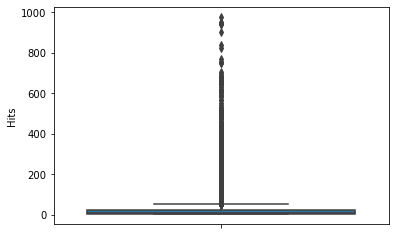

In [369]:
# Comparing the dfNew and df

# inspect for outliers 
# use boxplots
# Gaussian 
sns.boxplot(y='Hits',data=dfNew, orient='h')

C:\Users\Roselyn\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


<AxesSubplot:ylabel='Hits'>

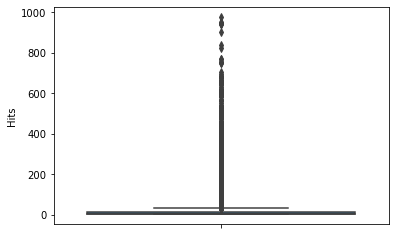

In [370]:
# inspect for outliers 
# use boxplots
# Gaussian 
sns.boxplot(y='Hits',data=df, orient='h')

In [372]:
# final treatment for Outliers using log transformation

dfNew_treated[numCols] = np.log1p(dfNew[numCols])



In [374]:
dfNew_treated.skew()

C:\Users\Roselyn\AppData\Local\Temp\ipykernel_23492\3638373138.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfNew_treated.skew()


ID                 -1.563558
Age                 0.416426
↓OVA               -0.300766
POT                -0.115558
BOV                -0.000386
Attacking          -1.981626
Crossing           -1.478237
Finishing          -1.336612
Heading Accuracy   -1.840317
Volleys            -1.376595
Skill              -1.715087
Curve              -1.221281
FK Accuracy        -0.916649
Long Passing       -1.362068
Ball Control       -2.178605
Movement           -1.446395
Acceleration       -1.792394
Sprint Speed       -1.822603
Agility            -1.328110
Reactions          -0.725891
Aggression         -0.429270
Vision             -0.376607
Penalties          -1.416511
Composure          -1.358470
Defending          -0.898669
Marking            -1.143825
GK Reflexes         2.477234
Total Stats        -1.245090
Base Stats         -0.018438
PAC                -1.198987
SHO                -0.902735
PAS                -0.807527
DRI                -1.157451
DEF                -0.694729
PHY           

<AxesSubplot:ylabel='Density'>

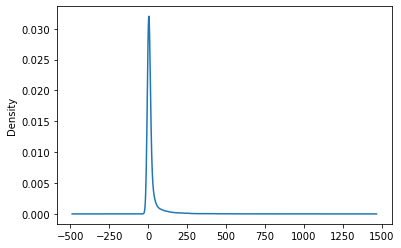

In [245]:
df['Hits'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

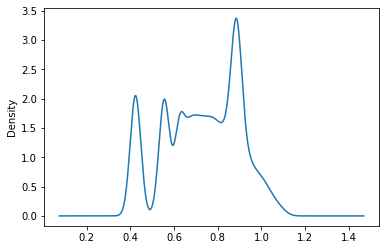

In [247]:
dfNew_treated['Hits'].plot(kind='density')

In [421]:
#Categorical features from the dataset
Categorical_features = dfNew.select_dtypes(include=["object","category"])

In [422]:
# numerical_features from the dataset
numerical_features = dfNew.select_dtypes(include = [np.number])

In [423]:
Categorical_features.columns

Index(['Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Club',
       'Contract', 'Positions', 'Height', 'Weight', 'Preferred Foot',
       'Best Position', 'Joined', 'Value', 'Wage', 'Release Clause',
       'Short Passing', 'Dribbling', 'W/F', 'SM', 'A/W', 'D/W', 'IR',
       'playerName', 'playerStatus', 'W/F1', 'SM1', 'IR1', 'wt_kg', 'hgt_bins',
       'wg_bins'],
      dtype='object')

In [424]:
numerical_features.columns

Index(['ID', 'Age', '↓OVA', 'POT', 'BOV', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Volleys', 'Skill', 'Curve', 'FK Accuracy',
       'Long Passing', 'Ball Control', 'Movement', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Aggression', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
       'Hits', 'CAM', 'CM', 'CF', 'RB', 'RM', 'ST', 'RWB', 'CB', 'RW', 'LB',
       'LW', 'LWB', 'CDM', 'LM', 'GK', 'hgt', 'wg'],
      dtype='object')

In [425]:
#Showing the correlation in respect to Hits column
Correlation=numerical_features.corr()["Hits"]
sorted = Correlation.sort_values(ascending=False)

In [426]:
#pd.set_option('display.max_rows', None)

In [427]:
print (sorted,"\n")

Hits                1.000000
POT                 0.541111
BOV                 0.227819
DRI                 0.168207
PAC                 0.161871
Base Stats          0.160512
Vision              0.157350
wg                  0.151360
↓OVA                0.150525
Movement            0.135598
Composure           0.125928
Acceleration        0.120299
Sprint Speed        0.116963
Reactions           0.112777
Total Stats         0.105797
Agility             0.105055
PAS                 0.103589
Curve               0.103481
Skill               0.097640
Ball Control        0.094229
SHO                 0.092587
Volleys             0.089263
ID                  0.089151
Finishing           0.085177
Attacking           0.083215
Long Passing        0.078782
Penalties           0.075538
Crossing            0.069127
FK Accuracy         0.061530
CF                  0.051387
Aggression          0.043168
Heading Accuracy    0.042326
GK                  0.024949
CDM                 0.016704
RW            

In [428]:
#pd.reset_option('display.max_rows')

In [429]:
Data_m = numerical_features[["POT","Hits","↓OVA","BOV","Reactions","Base Stats","Total Stats","DRI","Vision"]]

In [430]:
Data_m.head(3)

,POT,Hits,↓OVA,BOV,Reactions,Base Stats,Total Stats,DRI,Vision
0,4.488636,6.131226,4.430817,84.0,4.406719,470.0,7.660585,4.418841,74.0
1,4.488636,5.645447,4.430817,83.0,4.418841,471.0,7.669495,4.382027,75.0
2,4.499810,6.489205,4.430817,85.0,4.369448,425.0,7.595890,4.477337,76.0


In [431]:
Data_m.dropna(axis = 0, inplace =True)

C:\Users\Roselyn\AppData\Local\Temp\ipykernel_9128\3137587128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_m.dropna(axis = 0, inplace =True)


In [432]:
Data_m.isnull().sum()

POT            0
Hits           0
↓OVA           0
BOV            0
Reactions      0
Base Stats     0
Total Stats    0
DRI            0
Vision         0
dtype: int64

In [433]:
# Target variable
Y = Data_m.pop("Hits")
# The remaining columns in 'df' will be the feature variables (input variables)
X = Data_m

In [434]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Create and fit the linear regression model
model = LinearRegression()# Using lineaar regression bacause 'Hits' because is  a caterogical variariable
model.fit(X_train, y_train)

# Step 3: Predict using the testing data
y_pred = model.predict(X_test)

# Step 4 (continued): Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the accuracy metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.8140257413182618
Root Mean Squared Error: 0.9022337509305789
R-squared: 0.39441743947076524
